In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [40]:
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.30000,77860932152.00000
1,Chile,2001,77.30000,70979923960.00000
2,Chile,2002,77.80000,69736811435.00000
3,Chile,2003,77.90000,75643459840.00000
4,Chile,2004,78.00000,99210392858.00000


In [41]:
df.rename(columns={'Life expectancy at birth (years)': 'Life expectancy'}, inplace = True)

In [42]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          96 non-null     object 
 1   Year             96 non-null     int64  
 2   Life expectancy  96 non-null     float64
 3   GDP              96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.7+ KB
None


In [43]:
pd.set_option('display.float_format', lambda x: '%.5f' % x) #dealing with the scientific notation
df.head()

,Country,Year,Life expectancy,GDP
0,Chile,2000,77.30000,77860932152.00000
1,Chile,2001,77.30000,70979923960.00000
2,Chile,2002,77.80000,69736811435.00000
3,Chile,2003,77.90000,75643459840.00000
4,Chile,2004,78.00000,99210392858.00000


In [44]:
countries = df['Country'].unique()
countries

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [45]:
year = df['Year'].unique()
year

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

In [46]:
dfx = df.groupby(['Country']).mean().reset_index()
dfx.head()

,Country,Year,Life expectancy,GDP
0,Chile,2007.50000,78.94375,169788845015.31250
1,China,2007.50000,74.26250,4957713750000.00000
2,Germany,2007.50000,79.65625,3094775625000.00000
3,Mexico,2007.50000,75.71875,976650625000.00000
4,United States of America,2007.50000,78.06250,14075000000000.00000


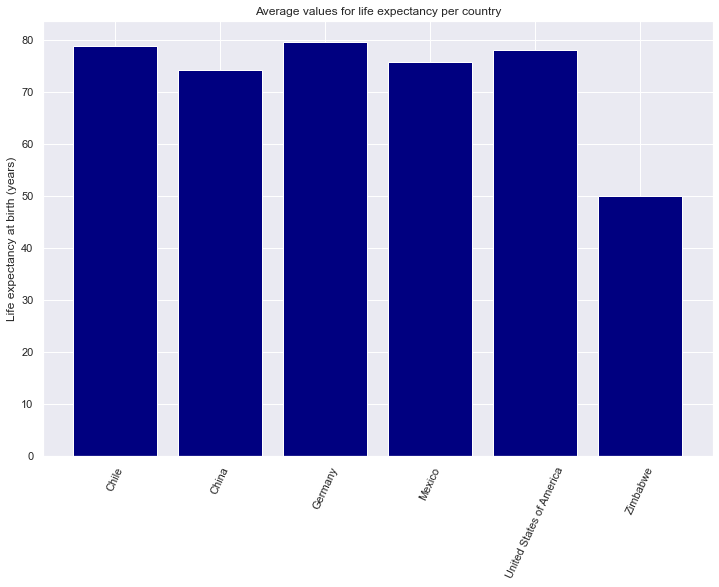

In [47]:
sns.color_palette("Paired")
ax = plt.subplot()
plt.bar(range(len(dfx['Country'])), dfx['Life expectancy'], color = 'navy')
ax.set_xticks(range(len(dfx['Country'])))
ax.set_xticklabels(dfx['Country'], rotation = 65)
plt.ylabel('Life expectancy at birth (years)')
plt.title('Average values for life expectancy per country')
plt.show()

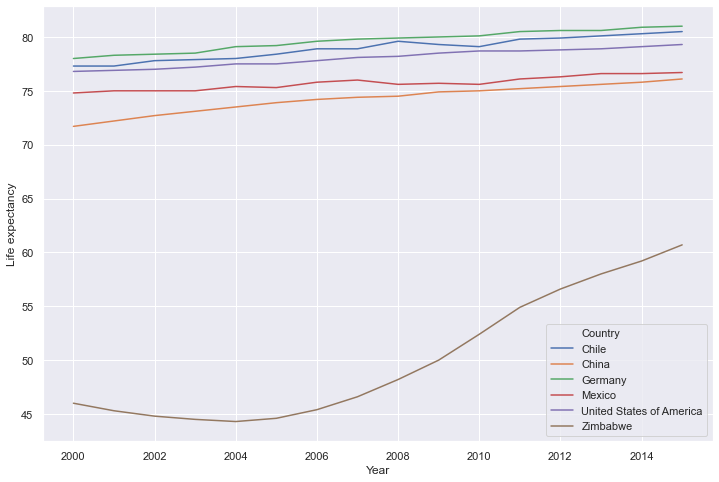

In [48]:
sns.color_palette("Paired")
sns.set(rc={'figure.figsize':(12,8)})
sns.lineplot(data = df, x = 'Year', y = 'Life expectancy', hue = 'Country')
plt.show()

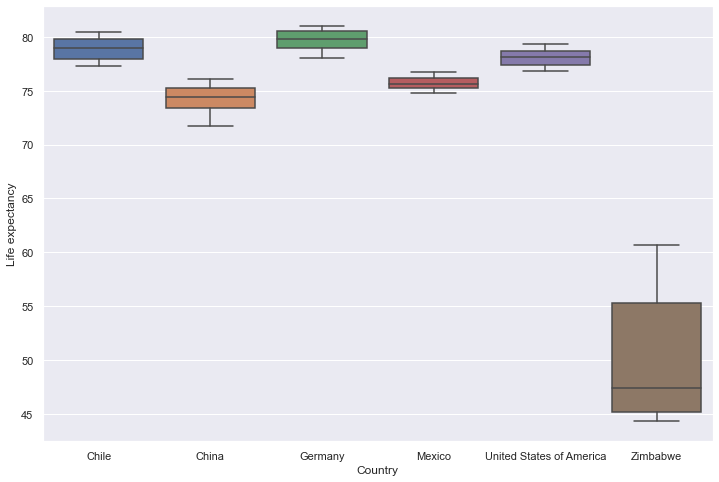

<Figure size 864x576 with 0 Axes>

In [49]:
sns.color_palette("Paired")
sns.boxplot(data = df, x='Country' , y='Life expectancy')
plt.show()
plt.clf()

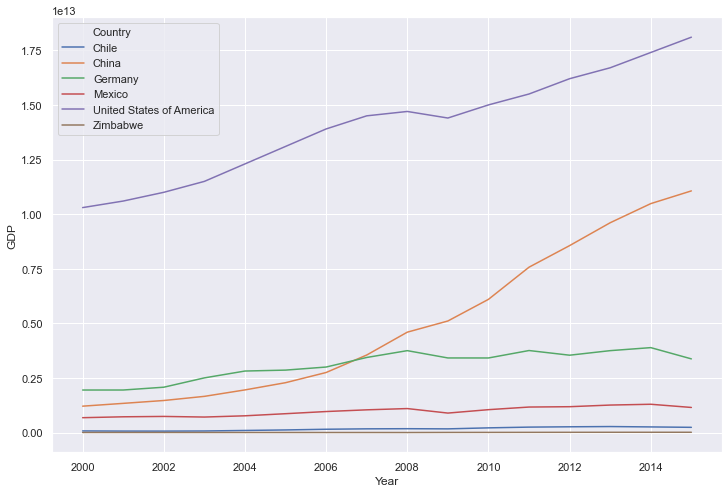

In [50]:
sns.color_palette('pastel')
sns.set(rc={'figure.figsize':(12,8)})
sns.lineplot(data = df, x = 'Year', y = 'GDP', hue = 'Country')
plt.show()

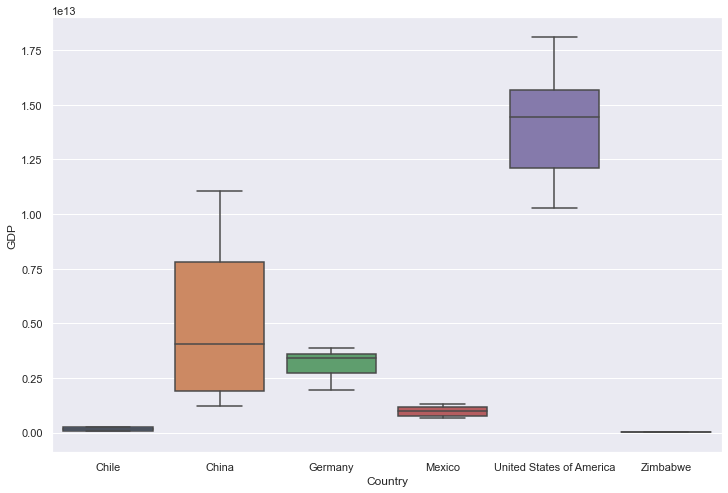

In [51]:
sns.color_palette("pastel")
sns.boxplot(data = df, x='Country' , y='GDP')
plt.show()

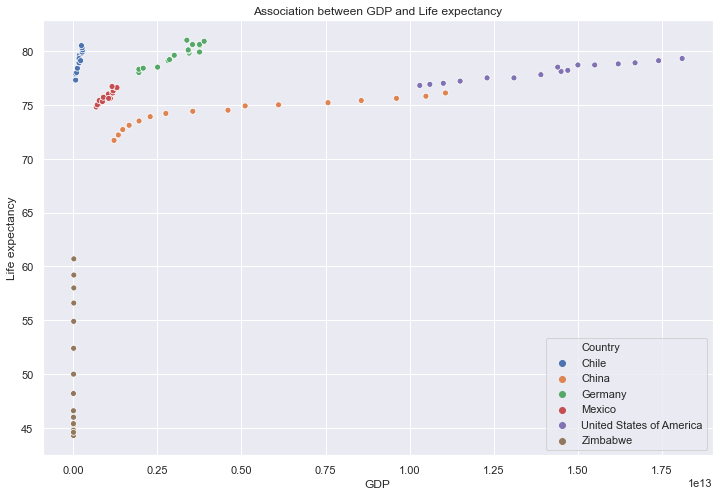

In [52]:
sns.scatterplot(data=df, x="GDP", y="Life expectancy", palette="deep", hue='Country')
plt.title('Association between GDP and Life expectancy')
plt.show()

In [71]:
from sklearn import preprocessing
gdp = preprocessing.normalize([df['GDP']])

In [70]:
from scipy.stats import pearsonr
correlation, pval = pearsonr(, gdp[0])
correlation

0.3432067484491559